<a href="https://colab.research.google.com/github/myoungjinseo/data-analysis/blob/main/hw12_202014132.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 타이타닉 생존자 분류 문제
+ 타이타닉 승선 정보를 이용하여 승객의 생존 여부를 <U>분류</U>하는 문제
+ 분류 (classification)
    + 여러 개의 클래스(또흔 종류) 중 하나를 구별해내는 <U>지도 학습</U>의 대표적인 문제
    - 이진 분류(Binary classification)
      - 2개의 클래스 중에서 하나를 고르는 문제
+ 타이타닉 생존자 분류 문제는 샘플의 타겟이 생존(1), 사망(0)으로 구부뇌는 이진 분류 모델 

연속된 수치 - 회귀<-> 분류

다중 분류 (mutil-class classification) - 여러개를 분류하는 문제

## 타이타닉 데이터셋의 구성
+ pclass : 승객 등급
+ name : 승객이름
+ sex : 승객 성별
+ age : 승객 나이
+ sibsp : 동승한 형제 또는 배우자 수
+ parch : 동승한 부모 또는 자녀 수
+ ticket : 티켓 번호
+ fare : 지불 요금
+ cabin : 선실 이름
+ embarked : 승선항(C :  쉴부르크 , Q: 퀸즈타운 , S: 사우스햄트) => 범주형
+ body : 사망자 식별 번호
+ home.dest : 고향 또는 목적지
+ survived : 생존 여부(1: 생존 0:사망)


## 훈련 세트와 테스트 세트
+ <U>지도 학습</U> 모델의 성능 평가를 제대로 하기 위해서는 <U>훈련</U> 데이터와 <U>평가에 사용할 데이터</U>가 달라야함

+ 훈련 세트(train set)
  + 훈련에 사용하는 데이터
  + titanic_train.csv => 훈련 => 정답을 알고있음
+ 테스트 세트(test set)
  + 평가에 사용하는 데이터
  + titanic_test.csv => 정답모름 => 예측한 결과를 예측 => 정답 - 예측결과 로 평가


In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/data

import warnings 
warnings.filterwarnings('ignore')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/data


In [ ]:
!ls -al

total 48956
-rw------- 1 root root    17945 Jun 16 06:53 batter_stats_2017.csv
-rw------- 1 root root    53564 Jun 16 06:53 BostonHousing2.csv
-rw------- 1 root root   364975 Jun 16 06:53 chipotle.tsv
drwx------ 3 root root     4096 Dec  4 18:31 data
-rw------- 1 root root     4973 Jun 16 06:53 drinks.csv
-rw------- 1 root root     7007 Jun 16 06:53 korean_stopwords.txt
-rw------- 1 root root    13167 Jun 16 06:53 market-price.csv
-rw------- 1 root root      191 Jun 16 06:53 market-price-test.csv
drwx------ 2 root root     4096 Dec  4 18:31 ml-1m
-rw------- 1 root root 45580638 Jun 16 06:53 online_retail.csv
-rw------- 1 root root    14726 Jun 16 06:53 picher_stats_2017.csv
-rw------- 1 root root    30870 Jun 16 06:53 titanic_test.csv
-rw------- 1 root root    72945 Jun 16 06:53 titanic_train.csv
-rw------- 1 root root  3598948 Jun 16 06:53 used_mobile_phone.csv
-rw------- 1 root root     6327 Jun 16 06:53 used_mobile_phone_stopwords.pkl
drwx------ 2 root root     4096 Dec  4 18:31 use

In [ ]:
import pandas as pd

train_df = pd.read_csv('./titanic_train.csv')
test_df = pd.read_csv('./titanic_test.csv')

train_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S,NaN,"England / Bennington, VT"
1,2,1,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0000,NaN,S,NaN,"Cornwall / Akron, OH"
2,2,1,"Duran y More, Miss. Florentina",female,30.0,1,0,SC/PARIS 2148,13.8583,NaN,C,NaN,"Barcelona, Spain / Havana, Cuba"
3,3,0,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q,NaN,NaN
4,3,1,"Bradley, Miss. Bridget Delia",female,22.0,0,0,334914,7.7250,NaN,Q,NaN,"Kingwilliamstown, Co Cork, Ireland Glens Falls..."


In [ ]:
test_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,3,0,"Rekic, Mr. Tido",male,38.0,0,0,349249,7.8958,NaN,S,NaN,NaN
1,2,1,"Phillips, Miss. Alice Frances Louisa",female,21.0,0,1,S.O./P.P. 2,21.0000,NaN,S,NaN,"Ilfracombe, Devon"
2,2,0,"Jacobsohn, Mr. Sidney Samuel",male,42.0,1,0,243847,27.0000,NaN,S,NaN,London
3,3,0,"Risien, Mr. Samuel Beard",male,NaN,0,0,364498,14.5000,NaN,S,NaN,NaN
4,2,0,"Denbury, Mr. Herbert",male,25.0,0,0,C.A. 31029,31.5000,NaN,S,NaN,"Guernsey / Elizabeth, NJ"


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     916 non-null    int64  
 1   survived   916 non-null    int64  
 2   name       916 non-null    object 
 3   sex        916 non-null    object 
 4   age        741 non-null    float64
 5   sibsp      916 non-null    int64  
 6   parch      916 non-null    int64  
 7   ticket     916 non-null    object 
 8   fare       916 non-null    float64
 9   cabin      214 non-null    object 
 10  embarked   914 non-null    object 
 11  body       85 non-null     float64
 12  home.dest  527 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 93.2+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     393 non-null    int64  
 1   survived   393 non-null    int64  
 2   name       393 non-null    object 
 3   sex        393 non-null    object 
 4   age        305 non-null    float64
 5   sibsp      393 non-null    int64  
 6   parch      393 non-null    int64  
 7   ticket     393 non-null    object 
 8   fare       393 non-null    float64
 9   cabin      81 non-null     object 
 10  embarked   393 non-null    object 
 11  body       36 non-null     float64
 12  home.dest  218 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 40.0+ KB


## 타이타닉 데이터셋 기본 정보
- DataFrame.info()
- 훈련 세트의 샘플 수 : 916개
- 테스트 세트의 샘플 수: 393개
- 일부 피처에 결측치가 존재

## 불필요한 피처 제거하기
- 분석에 활용할 수 없는 피처
  -name, cabin
- 큰 의미가 없는 피처
  - ticket, body, home.dst
- DataFame.drop
  - 매개 변수로 전달된 행이나 열을 제거
  - axis=0: 인덱스(0) 또는 열제목 (1)
  - inplace = False (기본 값이 False)

In [ ]:
train_df.drop(['name','cabin','ticket','body','home.dest'],axis=1,inplace=True)

In [ ]:
train_df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,2,1,female,13.0,0,1,19.5000,S
1,2,1,female,4.0,1,1,23.0000,S
2,2,1,female,30.0,1,0,13.8583,C
3,3,0,male,NaN,0,0,7.7250,Q
4,3,1,female,22.0,0,0,7.7250,Q


In [ ]:
test_df = test_df.drop(['name','cabin','ticket','body','home.dest'],axis=1)

In [ ]:
test_df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,3,0,male,38.0,0,0,7.8958,S
1,2,1,female,21.0,0,1,21.0000,S
2,2,0,male,42.0,1,0,27.0000,S
3,3,0,male,NaN,0,0,14.5000,S
4,2,0,male,25.0,0,0,31.5000,S


## 탐색적 데이터 분석
- 생존자 비율
- 승객 등급 비율 
- pyplot.bar()

In [ ]:
survived_count = train_df['survived'].value_counts().sort_index()
print(survived_count)

0    563
1    353
Name: survived, dtype: int64


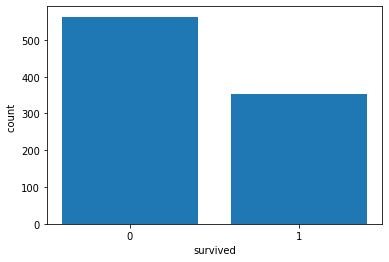

In [ ]:
import matplotlib.pyplot as plt

plt.bar(survived_count.index,survived_count.values)
plt.xticks(survived_count.index)
plt.xlabel('survived')
plt.ylabel('count ')
plt.show()


1    230
2    188
3    498
Name: pclass, dtype: int64


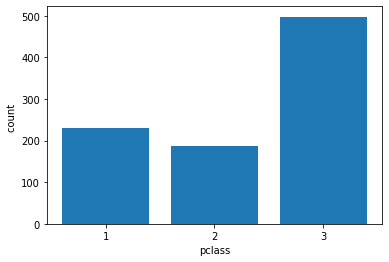

In [ ]:
pclass_count = train_df['pclass'].value_counts().sort_index()
print(pclass_count)

plt.bar(pclass_count.index,pclass_count.values)
plt.xticks(pclass_count.index)
plt.xlabel('pclass')
plt.ylabel('count ')
plt.show()


## 탐색적 데이터 분석
- 승객 등급별 생존자 분포
  - 승객 등급별로 생존자 수를 시각화
- seaborn.countplot()
  - x:그룹화할 피처 정보
  - hue : 그훕화 정보

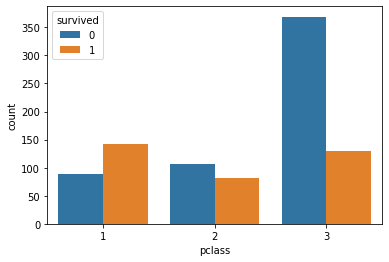

In [ ]:
import seaborn as sns

sns.countplot(x='pclass', hue ='survived',data =train_df)
plt.show()

## Step2 분류: 생존자 분류 모델 만들기
- 데이터 전처리
  - 결측치, 범주형 피처 전처리
- 로지스틱 회귀 모델
- 결정 트리 모델
- 분류 모델의 평가

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    916 non-null    int64  
 1   survived  916 non-null    int64  
 2   sex       916 non-null    object 
 3   age       741 non-null    float64
 4   sibsp     916 non-null    int64  
 5   parch     916 non-null    int64  
 6   fare      916 non-null    float64
 7   embarked  914 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 57.4+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    393 non-null    int64  
 1   survived  393 non-null    int64  
 2   sex       393 non-null    object 
 3   age       305 non-null    float64
 4   sibsp     393 non-null    int64  
 5   parch     393 non-null    int64  
 6   fare      393 non-null    float64
 7   embarked  393 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 24.7+ KB


## 데이터 전처리
- 일부 샘플의 결측치 존재
  - age, embarked
- 범주형 피처 존

- 결측값 처리 방법
1. 결측이 존재하는 **샘플**을 제거하기
  - 처리가 쉬우나 주관이 개입될 여지가 있고, **중요한 데이터**가 삭제될 가능성이 큼
2. **평균값**, **중앙값**, **최빈값** 등으로 채우기
  - 수치형 피처는 **평균값** 또는 **중앙값** 사용
  - 범주형 피처는 **최빈값**을 사용
  - **모든 샘플을 분석에 활용**할 수 있지만, **데이터가 왜곡될 수 있음**


In [ ]:
train_df

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,2,1,female,13.00,0,1,19.5000,S
1,2,1,female,4.00,1,1,23.0000,S
2,2,1,female,30.00,1,0,13.8583,C
3,3,0,male,NaN,0,0,7.7250,Q
4,3,1,female,22.00,0,0,7.7250,Q
...,...,...,...,...,...,...,...,...
911,3,1,female,0.17,1,2,20.5750,S
912,3,0,male,NaN,0,0,8.0500,S
913,3,1,female,NaN,0,0,7.7333,Q
914,2,1,female,20.00,0,0,36.7500,S


In [ ]:
age_mean = train_df[train_df['age']>0]['age'].mean()

In [ ]:
train_df['age'] = train_df['age'].fillna(age_mean)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    916 non-null    int64  
 1   survived  916 non-null    int64  
 2   sex       916 non-null    object 
 3   age       916 non-null    float64
 4   sibsp     916 non-null    int64  
 5   parch     916 non-null    int64  
 6   fare      916 non-null    float64
 7   embarked  914 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 57.4+ KB


In [ ]:
test_df['age'] = test_df['age'].fillna(age_mean)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    393 non-null    int64  
 1   survived  393 non-null    int64  
 2   sex       393 non-null    object 
 3   age       393 non-null    float64
 4   sibsp     393 non-null    int64  
 5   parch     393 non-null    int64  
 6   fare      393 non-null    float64
 7   embarked  393 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 24.7+ KB


In [ ]:
embarked_mode= train_df['embarked'].value_counts().index[0]

In [ ]:
train_df['embarked'] = train_df['embarked'].fillna(embarked_mode)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    916 non-null    int64  
 1   survived  916 non-null    int64  
 2   sex       916 non-null    object 
 3   age       916 non-null    float64
 4   sibsp     916 non-null    int64  
 5   parch     916 non-null    int64  
 6   fare      916 non-null    float64
 7   embarked  916 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 57.4+ KB


## 데이터 전처리
- 범주형 피처 처리 방법
  - **원-핫 인코딩**을 적용하여 범주형 피처를 수치형 피처로 변환
- pandas.**get_dummies()**

In [ ]:
data_df = train_df.append(test_df)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 392
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1309 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1309 non-null   float64
 7   embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 92.0+ KB


In [ ]:
train_num = len(train_df)

In [ ]:
train_df.head() 

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,2,1,female,13.000000,0,1,19.5000,S
1,2,1,female,4.000000,1,1,23.0000,S
2,2,1,female,30.000000,1,0,13.8583,C
3,3,0,male,30.231444,0,0,7.7250,Q
4,3,1,female,22.000000,0,0,7.7250,Q


In [ ]:
data_df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,2,1,female,13.000000,0,1,19.5000,S
1,2,1,female,4.000000,1,1,23.0000,S
2,2,1,female,30.000000,1,0,13.8583,C
3,3,0,male,30.231444,0,0,7.7250,Q
4,3,1,female,22.000000,0,0,7.7250,Q


In [ ]:
encoded_data_df = pd.get_dummies(data_df)
encoded_data_df.head()

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,2,1,13.000000,0,1,19.5000,1,0,0,0,1
1,2,1,4.000000,1,1,23.0000,1,0,0,0,1
2,2,1,30.000000,1,0,13.8583,1,0,1,0,0
3,3,0,30.231444,0,0,7.7250,0,1,0,1,0
4,3,1,22.000000,0,0,7.7250,1,0,0,1,0


In [ ]:
train_df = encoded_data_df[:train_num]
test_df = encoded_data_df[train_num:]

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 392
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      393 non-null    int64  
 1   survived    393 non-null    int64  
 2   age         393 non-null    float64
 3   sibsp       393 non-null    int64  
 4   parch       393 non-null    int64  
 5   fare        393 non-null    float64
 6   sex_female  393 non-null    uint8  
 7   sex_male    393 non-null    uint8  
 8   embarked_C  393 non-null    uint8  
 9   embarked_Q  393 non-null    uint8  
 10  embarked_S  393 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 23.4 KB


## 로지스틱 **회귀**
- 선형 회귀식을 훈련하는 **분류** 모델
  **$$z = ax_1+bx_2+cx_3+dx_4+ex_5+f$$**
  - 계수(가중치), 절편
  - 함수의 범위는 **-무한 ~ 무한**
- 시그모이드 함수를 통해 선형 회귀식의 출력을 0~1 값으로 제한하여 **0.5보다 크거나 같으면 1, 0.5보다 작으면 0으로 분류**
- 가중치(계수) 분석을 통해 피처의 영향력 해석이 용이함


지도 학습을 위한 훈련 데이터 구성
- 훈련 데이터 (X, y)
  - **입력 데이터**와 **타겟**으로 구성된 지도 학습
모델에 사용하는 데이터
  - 입력 데이터(x)
    - 각 데이터 샘플을 나타내는 피처로 구성
    - **2차원 배열**로 저장 (샘플수, 특성수)
  -타겟(정답)(y)
    - 각 데이터 샘플이 속하는 클래스(또는 라벨)
    - **1차원 배열**로 저장 (샘플수,)
-타이타닉 데이터는 입력과 타겟이 섞여있기 때문에
분리하는 별도 작업이 필요함

In [ ]:
train_df.loc[:,'survived'].values.shape # 1차원 배열

(916,)

In [ ]:
train_df.loc[:,train_df.columns!='survived'].values.shape # 2차원 배열

(916, 10)

In [ ]:
y_train = train_df.loc[:,'survived'].values

In [ ]:
x_train = train_df.loc[:,train_df.columns!='survived'].values

In [ ]:
x_test = test_df.loc[:,test_df.columns!='survived'].values
x_test.shape

(393, 10)

In [ ]:
y_test = test_df.loc[:,'survived'].values
y_test.shape

(393,)

## 로지스틱 회귀 분류 모델 구현
- LogisticRegression 클래스
  - sklearn.linear_model 패키지
  - random_state=None
  - fit() 메서드
    - 모델을 훈련
  - predict() 메서드
    - 모델이 예측한 클래스 값 반환
  - predict_proba() 메서드
    - 모델이 예측한 클래스 별 확률
  - score() 메서드
    - 입력 데이터의 예측값과 정답을 비교한 정확도를 반환

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
print(x_test[:10])

[[ 3.         38.          0.          0.          7.8958      0.
   1.          0.          0.          1.        ]
 [ 2.         21.          0.          1.         21.          1.
   0.          0.          0.          1.        ]
 [ 2.         42.          1.          0.         27.          0.
   1.          0.          0.          1.        ]
 [ 3.         30.23144399  0.          0.         14.5         0.
   1.          0.          0.          1.        ]
 [ 2.         25.          0.          0.         31.5         0.
   1.          0.          0.          1.        ]
 [ 3.          4.          1.          1.         16.7         1.
   0.          0.          0.          1.        ]
 [ 1.         48.          0.          0.         26.55        0.
   1.          0.          0.          1.        ]
 [ 1.         52.          0.          0.         30.5         0.
   1.          0.          0.          1.        ]
 [ 2.         57.          0.          0.         13.          0

In [ ]:
print(y_test[:10])
print(y_pred[:10])

[0 1 0 0 0 1 1 1 0 1]
[0 1 0 0 0 1 0 0 0 0]


In [ ]:
y_pred_proba = lr.predict_proba(x_test)[:,1]
y_pred_proba[:10]

array([0.0832119 , 0.8305405 , 0.12086608, 0.10316494, 0.24841178,
       0.69858129, 0.28677684, 0.26362213, 0.11143508, 0.10269438])

In [ ]:
lr.score(x_test,y_test)

0.7964376590330788

## 결정 트리
- 의사 결정 나무 트리 모델
- 조건 분기에 따라 데이터를 분류하는 모델
- 데이터를 잘 나눌 수 있는 조건을 추가하여 분류 정확도를 높임
  - 스무고개와 같이 질문을 하나씩 던져서 정답을 

## 결정 트리 분류 모델 구현
- DecisionTreeClassifier 클래스
  - sklearn.tree 패키지
  - random_state=None
  - fit() 메서드
    - 모델을 훈련
  - predict() 메서드
    - 모델이 예측한 클래스 값 반환
  - score() 메서드
    - 입력 데이터의 예측값과 정답을 비교한 정확도를 반환

In [ ]:
from sklearn.tree import  DecisionTreeClassifier

dt  = LogisticRegression(random_state=0)
dt.fit(x_train,y_train)



LogisticRegression(random_state=0)

In [ ]:
x_pred = dt.predict(x_test)
print(y_test[:10])
print(y_pred[:10])

[0 1 0 0 0 1 1 1 0 1]
[0 1 0 0 0 1 0 0 0 0]


In [ ]:
dt.score(x_test,y_test)

0.7964376590330788

## 핵심 클래스와 메서드, 함수
- pandas 라이브러리
  - DataFrame.drop()
  - Series.fillna()
- seaborn 라이브러리
  - countplot()
- sklearn 라이브러리
  - linear_model.LogisticRegression
  - tree.DecisionTreeClassifier
    - fit()
    - predict()
    - score()

## 분류 모델의 평가
- 오차 행렬Confusion Matrix
  - Predicted Class : 모델이 예측하여 분류한 결과 (P/N)
  - Actual Class : 실제 데이터의 타겟 (P/N)
  - TPTrue Postives : 1인 값을 1이라 예측한 경우
    - 관심 범주를 정확하게 분류한 것
  - FNFalse Negatives : 1인 값을 0이라 예측한 경우
    - 관심 범주가 아닌 것으로 잘못 분류한 것
  - FPFalse Postives : 0인 값을 1이라 예측한 경우
    - 관심 범주라고 분류한 것이 잘못된 것
  - TNTrue Negatives : 0인 값을 0이라 예측한 경우
    - 관심 범주가 아니라는 것을 정확하게 분류한 것

## 분류 모델의 성능 평가
- confusion_matrix(y_true, y_pred)함수
  - sklearn.metrics 패키지에 포함
  - y_true : 실제 타겟 값
  - y_pred: 예측 타겟 값

In [ ]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=y_test,y_pred=y_pred)
confmat

array([[214,  32],
       [ 48,  99]])

## 분류 모델의 성능 평가
- 정확도Accuracy
  - 𝐴𝑐𝑐𝑢𝑟𝑎𝑐𝑦 =
𝑇𝑃+𝑇𝑁/𝑇𝑃+𝑇𝑁+𝐹𝑃+𝐹𝑁
- 정밀도Precision
  - 𝑃𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛 =
𝑇𝑃/𝑇𝑃+𝐹𝑃
- 재현율Recall
- 𝑅𝑒𝑐𝑎𝑙𝑙 =𝑇𝑃/𝑇𝑃+𝐹𝑁
- F1-score
  - 𝐹1 =2∙𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛∙𝑟𝑒𝑐𝑎𝑙𝑙/𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛+𝑟𝑒𝑐𝑎𝑙𝑙

## 분류 모델의 성능 평가
- accuracy_score(y_true, y_pred) 함수
- precision_score(y_true, y_pred) 함수
- recall_score(y_true, y_pred) 함수
- f1_score(y_true, y_pred) 함수
  - sklearn.metrics 모듈에 포함
  - y_true : 실제 타겟 값
  - y_pred : 예측 타겟 값

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

print(accuracy_score(y_true=y_test, y_pred=y_pred))
print(precision_score(y_true=y_test, y_pred=y_pred))
print(f1_score(y_true=y_test, y_pred=y_pred))
print(recall_score(y_true=y_test, y_pred=y_pred))


0.7964376590330788
0.7557251908396947
0.712230215827338
0.673469387755102


## 분류 모델의 성능 평가
- 민감도sensitivity
  - 𝑆𝑒𝑛𝑠𝑖𝑡𝑖𝑣𝑖𝑡𝑦 =𝑇𝑃/𝑇𝑃+𝐹𝑁
- 특이도Specificity
  - 𝑆𝑝𝑒𝑐𝑖𝑓𝑖𝑐𝑖𝑡𝑦 =𝑇𝑁/𝑇𝑁+𝐹𝑃
- ROC 곡선ROC curve; Receiver Operating Characteristic curve
  - Threshold을 바꾸면서 FPR(=1-specificity)와 TPR(=sensitivity) 의 관계를 그려낸 곡선
- AUC (Area Under Curve)
  - ROC 곡선 아래 영역의 넓이로 1에 가까울 수록 좋은 모델

## 분류 모델의 평가 구현 (2)
- roc_curve(y_true, y_score) 함수
  - 이진 분류에서 ROC를 계산하여 반환
    - (fpr, tpr, threshold)
- auc_roc_curve(y_true, y_score) 함수
  - ROC 곡선 아래 면적을 계산하여 반환
  - y_true : 실제 타겟 값
  - y_score : 예측 확률 값

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr,tpr,thres = roc_curve(y_test,y_pred_proba)

(fpr,tpr,thres )

(array([0.        , 0.        , 0.        , 0.00406504, 0.00406504,
        0.00813008, 0.00813008, 0.02439024, 0.02439024, 0.02845528,
        0.02845528, 0.03252033, 0.03252033, 0.04065041, 0.04065041,
        0.04878049, 0.05284553, 0.05284553, 0.06097561, 0.06097561,
        0.08130081, 0.08130081, 0.09349593, 0.09349593, 0.09756098,
        0.09756098, 0.10162602, 0.10162602, 0.1097561 , 0.11382114,
        0.11382114, 0.11788618, 0.11788618, 0.1300813 , 0.1300813 ,
        0.13821138, 0.13821138, 0.14634146, 0.14634146, 0.16666667,
        0.16666667, 0.17479675, 0.17479675, 0.17886179, 0.17886179,
        0.20325203, 0.20325203, 0.21138211, 0.21138211, 0.22357724,
        0.22357724, 0.22764228, 0.22764228, 0.24390244, 0.24390244,
        0.25203252, 0.25203252, 0.25609756, 0.29268293, 0.29268293,
        0.30487805, 0.30894309, 0.31707317, 0.31707317, 0.35772358,
        0.36585366, 0.37804878, 0.37804878, 0.38211382, 0.38211382,
        0.40650407, 0.40650407, 0.41056911, 0.41

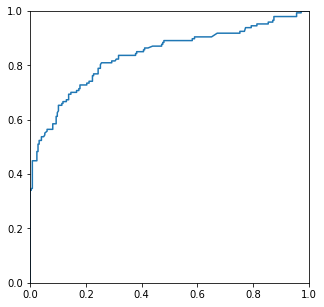

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.plot(fpr,tpr)
plt.xlim([0,1.0])
plt.ylim([0,1.0])
plt.show()

## 분류 모델의 피처 영향력
- 선형 회귀와 마찬가지로 선형 식의 계수의 크기로 피처 영향력을 확인할 수  

In [ ]:
feature_name = encoded_data_df.columns.to_list()
feature_name.remove('survived')
feature_name 

['pclass',
 'age',
 'sibsp',
 'parch',
 'fare',
 'sex_female',
 'sex_male',
 'embarked_C',
 'embarked_Q',
 'embarked_S']

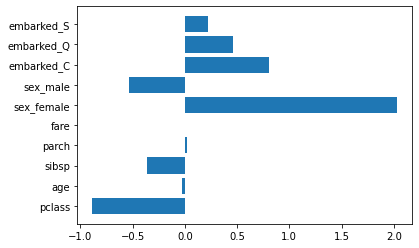

In [ ]:
plt.barh(feature_name,lr.coef_[0])
plt.show()

## Step3 모델 개선: 특성 공학


## 분류 모델의 성능을 개선하는 방법
1. 다른 분류 모델을 사용
2. 많은 훈련 데이터를 사용
3. 특성 공학feature engineering; 피쳐 엔지니어링
  - 모델을 훈련시키는데 사용할 입력 데이터의 특성을 가공하여 분석하는 작업

## 분류 모델의 피처 영향력
- 선형 회귀와 마찬가지로 선형 식의 계수의 크기로 피처 영향력을 확인할 수 있음

## 선실 정보와 승객 이름 활용하기
- 원본 데이터에서 ticket, body, home.dest 정보만 삭제
- 피처 age 결츢값 처리
- 피처 embarked 결측값 처리

In [ ]:
import pandas as pd

train_df = pd.read_csv('./titanic_train.csv')
test_df = pd.read_csv('./titanic_test.csv')

data_df = train_df.append(test_df)
train_num = len(train_df)

data_df = train_df.append(test_df)
train_num = len(train_df)

data_df.drop(['ticket','body','home.dest'],axis=1,inplace=True)

age_mean = data_df[data_df['age']>0]['age'].mean()
data_df['age'] = data_df['age'].fillna(age_mean)

embarked_mode = data_df['embarked'].value_counts().index[0]
data_df['embarked'] = data_df['embarked'].fillna(embarked_mode)

data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 392
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1309 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   fare      1309 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 112.5+ KB


## 선실 정보 분석과 처리
- cabin 피처는 선실 정보를 나타내며,
선실을 대표하는 알파벳이 첫 글자에 등장
하는 패턴을 가지고 있음
  - 결측값이 많기 때문에 결측값을 ‘X’로
채우고, cabin 피처의 첫 글자만 사용
  - 빈도가 작은 ‘G’, ‘T’를 ‘X’로 대체

In [ ]:
data_df['cabin'] = data_df['cabin'].fillna('X')
data_df['cabin'].value_counts()

X                  1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
F33                   4
                   ... 
C95                   1
D47                   1
A20                   1
B36                   1
E39 E41               1
Name: cabin, Length: 187, dtype: int64

In [ ]:
data_df['cabin'] = data_df['cabin'].apply(lambda x:x[0])

In [ ]:
data_df['cabin'].value_counts()

X    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: cabin, dtype: int64

In [ ]:
data_df['cabin'] = data_df['cabin'].replace({'G':'X','T':'X'})

In [ ]:
data_df['cabin'].value_counts()

X    1020
C      94
B      65
D      46
E      41
A      22
F      21
Name: cabin, dtype: int64

In [ ]:
data_df.head()

,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.000000,0,1,19.5000,X,S
1,2,1,"Wells, Miss. Joan",female,4.000000,1,1,23.0000,X,S
2,2,1,"Duran y More, Miss. Florentina",female,30.000000,1,0,13.8583,X,C
3,3,0,"Scanlan, Mr. James",male,29.881138,0,0,7.7250,X,Q
4,3,1,"Bradley, Miss. Bridget Delia",female,22.000000,0,0,7.7250,X,Q


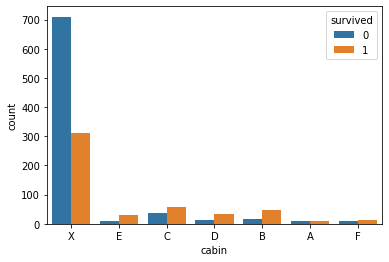

In [ ]:
import seaborn as sns

sns.countplot(x='cabin',hue='survived',data=data_df)
plt.show()

## 승객 이름 정보 분석과 처리
- 승객 이름에는 호칭과 경칭 정보가 존재
  - {last name}, {titles}. {first name}
- 호칭이나 경칭 정보만 분리하여 피처로 사용
  - split() 함수

In [ ]:
data_df['name']

0                 Mellinger, Miss. Madeleine Violet
1                                 Wells, Miss. Joan
2                    Duran y More, Miss. Florentina
3                                Scanlan, Mr. James
4                      Bradley, Miss. Bridget Delia
                           ...                     
388               Karlsson, Mr. Julius Konrad Eugen
389    Ware, Mrs. John James (Florence Louise Long)
390                            O'Keefe, Mr. Patrick
391                                Tobin, Mr. Roger
392                            Daniels, Miss. Sarah
Name: name, Length: 1309, dtype: object

In [ ]:
"Mellinger,Miss.Medeleine Violet".split(",")[1].split(".")

['Miss', 'Medeleine Violet']

In [ ]:
data_df['name'].apply(lambda x: x.split(",")[1].split(".")[0]).value_counts()

 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Mlle              2
 Major             2
 Ms                2
 Sir               1
 Capt              1
 Mme               1
 Don               1
 Dona              1
 Jonkheer          1
 Lady              1
 the Countess      1
Name: name, dtype: int64

In [ ]:
title_dict = {'A':['Ms','Mme','Mrs','Dona'],'B':['Miss','Mile','Lady'],
               'C':['Mr','Don'],'D':['Master'],'E':['Jonkheer','the Countess'],
               'F':['Rey','Col','Major','Dr','Capt','Sir']}
def get_title(x):
  title = x.split(", ")[1].split(".")[0]
  for key,value in title_dict.items():
    for t in value:
      if title == t:
        return key
  return 'X'

In [ ]:
get_title("Bradley, Miss. Bredget Delia")

'B'

## 승객 이름 정보 분석과 처리
- 호칭을 6개의 그룹으로 그룹핑을 하여
새로운 피처(title) 생성
  - 여성(A), 젊은 여성(B), 남성(C), 젊은
남성(D), 귀족(E), 명예직(F), N/A(X)
- 호칭에 따른 생존 여부 시각화
  - C그룹의 사망자가 다른 그룹에 비해
많음
  - 유의미한 피처일 가능성이 높음  

In [ ]:
data_df['title']= data_df['name'].apply(lambda x: get_title(x))

In [ ]:
data_df['title'].value_counts()

C    758
B    261
A    201
D     61
F     16
X     10
E      2
Name: title, dtype: int64

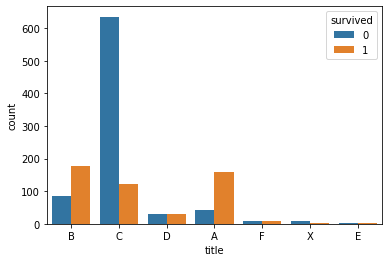

In [ ]:
sns.countplot(x='title',hue='survived',data=data_df)
plt.show()

In [ ]:
data_df.drop(['name'],axis=1,inplace=True)

In [ ]:
encoded_data_df = pd.get_dummies(data_df)
encoded_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 392
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1309 non-null   int64  
 1   survived    1309 non-null   int64  
 2   age         1309 non-null   float64
 3   sibsp       1309 non-null   int64  
 4   parch       1309 non-null   int64  
 5   fare        1309 non-null   float64
 6   sex_female  1309 non-null   uint8  
 7   sex_male    1309 non-null   uint8  
 8   cabin_A     1309 non-null   uint8  
 9   cabin_B     1309 non-null   uint8  
 10  cabin_C     1309 non-null   uint8  
 11  cabin_D     1309 non-null   uint8  
 12  cabin_E     1309 non-null   uint8  
 13  cabin_F     1309 non-null   uint8  
 14  cabin_X     1309 non-null   uint8  
 15  embarked_C  1309 non-null   uint8  
 16  embarked_Q  1309 non-null   uint8  
 17  embarked_S  1309 non-null   uint8  
 18  title_A     1309 non-null   uint8  
 19  title_B     1309 non-null   

In [ ]:
train_df = encoded_data_df[:train_num]
test_df = encoded_data_df[train_num:]

x_train = train_df.loc[:,train_df.columns!='survived'].values
y_train = train_df.loc[:,'survived'].values

x_test = test_df.loc[:,test_df.columns!='survived'].values
y_test = test_df.loc[:,'survived'].values

In [ ]:
from sklearn.linear_model import  LogisticRegression

lr = LogisticRegression(random_state=0)
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
y_pred_proba = lr.predict_proba(x_test)[:, 1]

print(y_test[:10])
print(y_pred[:10])
print(y_pred_proba[:10])

lr.score(x_test,y_test)

[0 1 0 0 0 1 1 1 0 1]
[0 1 0 0 0 1 0 0 0 0]
[0.07849052 0.74489897 0.08071841 0.09330105 0.17116234 0.59475666
 0.42885279 0.48699637 0.09104935 0.09175717]


0.7989821882951654

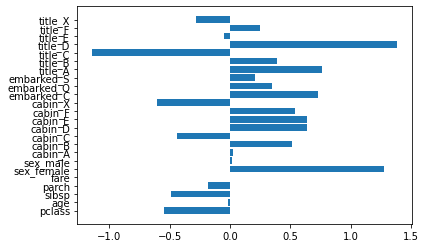

In [ ]:
feature_names = encoded_data_df.columns.to_list()
feature_names.remove('survived')

plt.barh(feature_names,lr.coef_[0])
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

print('accuracy=%.3f'%accuracy_score(y_true=y_test, y_pred=y_pred))
print('precision=%.3f'%precision_score(y_true=y_test, y_pred=y_pred))
print('F1-score=%.3f'%f1_score(y_true=y_test, y_pred=y_pred))
print('recall=%.3f'%recall_score(y_true=y_test, y_pred=y_pred))


accuracy=0.799
precision=0.739
F1-score=0.727
recall=0.714


In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr,tpr,thres = roc_curve(y_test,y_pred_proba)
auc = roc_auc_score(y_test,y_pred_proba)

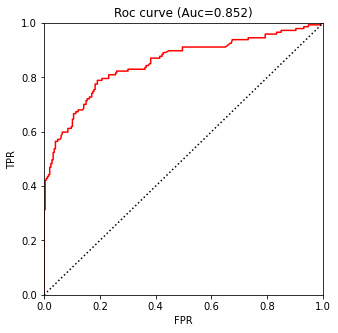

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,color='r')
plt.plot([0, 1], [0, 1], 'k:')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Roc curve (Auc=%.3f)'%auc)
plt.show()


## 정리
- 분류 모델 성능 평가 지표
  - 오차 행렬
  - 정확도, 정밀도, 재현율, F1-score
  - ROC, AUC
- 특성 공학

## 핵심 클래스와 메서드, 함수
- sklearn 라이브러리
∘metrics 패키지
  - confusion_matrix()
  - accuracy_score()
  - precision_score()
  - recall_score()
  - roc_score()
  - auc_roc_curve()